In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\Medibuddy Insurance.csv",encoding = "utf-8")

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   Children        1338 non-null   int64  
 2   Smoker          1338 non-null   object 
 3   Region          1338 non-null   object 
 4   Age             1338 non-null   int64  
 5   Sex             1338 non-null   object 
 6   BMI             1338 non-null   float64
 7   Charges in INR  1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [55]:
#Key Checks
print("Shape:", df.shape)
print("\nMissing values:\n", df.isna().sum())
print("\nDuplicate rows:", df.duplicated().sum())
print("\nColumns:", df.columns.tolist())

Shape: (1338, 8)

Missing values:
 Policy no.        0
Children          0
Smoker            0
Region            0
Age               0
Sex               0
BMI               0
Charges in INR    0
dtype: int64

Duplicate rows: 0

Columns: ['Policy no.', 'Children', 'Smoker', 'Region', 'Age', 'Sex', 'BMI', 'Charges in INR']


In [37]:
#Overview
df.head()

,Policy no.,Children,Smoker,Region,Age,Sex,BMI,Charges in INR
0,PLC157006,0,no,southwest,23,male,34.40,1826.8430
1,PLC156898,0,yes,southwest,19,female,27.90,16884.9240
2,PLC157033,1,no,southwest,19,male,24.60,1837.2370
3,PLC156907,1,no,southeast,18,male,33.77,1725.5523
4,PLC157060,0,no,southwest,56,male,40.30,10602.3850


In [43]:
#Summary
df.describe(include="all")

,Policy no.,Children,Smoker,Region,Age,Sex,BMI,Charges in INR
count,1338,1338.000000,1338,1338,1338.000000,1338,1338.000000,1338.000000
unique,1338,NaN,2,4,NaN,2,NaN,NaN
top,PLC157006,NaN,no,southeast,NaN,male,NaN,NaN
freq,1,NaN,1064,364,NaN,676,NaN,NaN
mean,NaN,1.094918,NaN,NaN,39.207025,NaN,30.663397,13270.422265
std,NaN,1.205493,NaN,NaN,14.049960,NaN,6.098187,12110.011237
min,NaN,0.000000,NaN,NaN,18.000000,NaN,15.960000,1121.873900
25%,NaN,0.000000,NaN,NaN,27.000000,NaN,26.296250,4740.287150
50%,NaN,1.000000,NaN,NaN,39.000000,NaN,30.400000,9382.033000
75%,NaN,2.000000,NaN,NaN,51.000000,NaN,34.693750,16639.912515


In [42]:
df[['Children','Age','BMI','Charges in INR']].describe().T

,count,mean,std,min,25%,50%,75%,max
Children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
Age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
BMI,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
Charges in INR,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [33]:
#Categorical Distributions
for col in ['Sex','Region','Smoker','Children']:
    print(f"\n{col} value counts:\n", df[col].value_counts())


Sex value counts:
 Sex
male      676
female    662
Name: count, dtype: int64

Region value counts:
 Region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Smoker value counts:
 Smoker
no     1064
yes     274
Name: count, dtype: int64

Children value counts:
 Children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


In [45]:
# Charges in INR by Categories 
df.groupby("Smoker")["Charges in INR"].describe()

,count,mean,std,min,25%,50%,75%,max
Smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


In [46]:
df.groupby("Sex")["Charges in INR"].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,662.0,12569.578844,11128.703801,1607.5101,4885.1587,9412.96250,14454.691825,63770.42801
male,676.0,13956.751178,12971.025915,1121.8739,4619.1340,9369.61575,18989.590250,62592.87309


In [65]:
df.groupby("Region")["Charges in INR"].mean().sort_values(ascending=False)

Region
southeast    14735.411438
northeast    13406.384516
northwest    12417.575374
southwest    12346.937377
Name: Charges in INR, dtype: float64

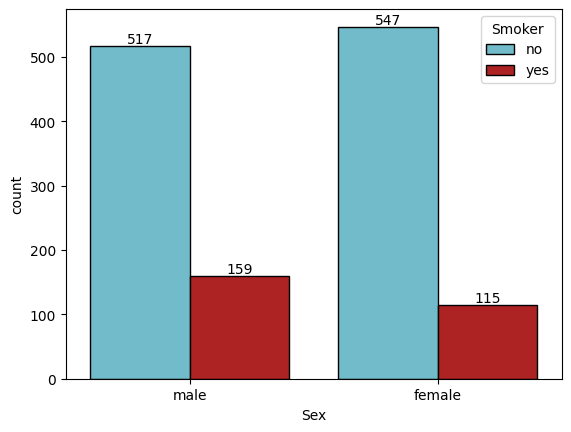

In [231]:
# Distribution of smokers/ Non-smokers by gender
ax = sns.countplot(data=df, x="Sex", hue = "Smoker", palette=["#63c5da","#c40c0c"],edgecolor="black")   
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

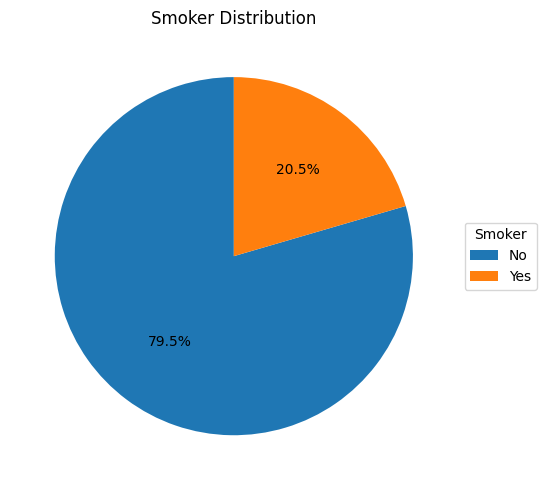

In [233]:
counts = df["Smoker"].value_counts()

plt.figure(figsize=(6,5))
wedges, texts, autotexts = plt.pie(counts.values,autopct="%1.1f%%",startangle=90)

plt.legend(wedges,[f"{str(i).capitalize()}" for i in counts.index], title="Smoker", loc="center left", bbox_to_anchor= (1, 0.5))
plt.title("Smoker Distribution")
plt.tight_layout()
plt.show()

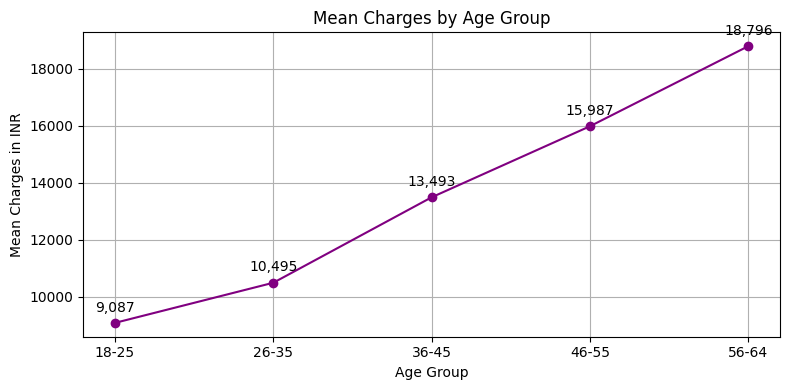

In [224]:
df["age_group"] = pd.cut(df["Age"], bins=[17,25,35,45,55,65],
                         labels=["18-25","26-35","36-45","46-55","56-64"],
                         include_lowest=True)

agegrp_mean = df.groupby("age_group", observed=True)[target].mean()
x= agegrp_mean.index.astype(str)
y = agegrp_mean.values
plt.figure(figsize=(8,4))
plt.plot(x, y,color = "purple", marker="o")
plt.title("Mean Charges by Age Group")
plt.xlabel("Age Group")
plt.ylabel(f"Mean {target}")
plt.grid(True)
offset = 0.03 * (max(y) - min(y))
for i, val in enumerate(y):
    plt.text(i, val + offset, f"{val:,.0f}", ha="center", va="bottom")
plt.tight_layout()
plt.show()

In [129]:
age_bins = pd.cut(df["Age"], bins=[17, 25, 35, 45, 55, 65],
                      labels=["18-25", "26-35", "36-45", "46-55", "56-64"])
display(df.groupby(age_bins, observed = True)[target].describe())

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
18-25,306.0,9087.015807,11756.765169,1121.8739,1875.990350,2636.017450,14535.436562,44501.39820
26-35,268.0,10495.163047,11349.435800,2302.3000,3993.093600,4900.581475,16459.815787,58571.07448
36-45,264.0,13493.485247,12096.975467,4399.7310,6536.205262,7442.572025,18648.130925,62592.87309
46-55,284.0,15986.900310,11367.399823,7147.1050,9347.170575,10477.962600,21225.802415,63770.42801
56-64,216.0,18795.993816,11482.258434,10577.0870,12203.916475,13429.650200,17519.035972,52590.82939


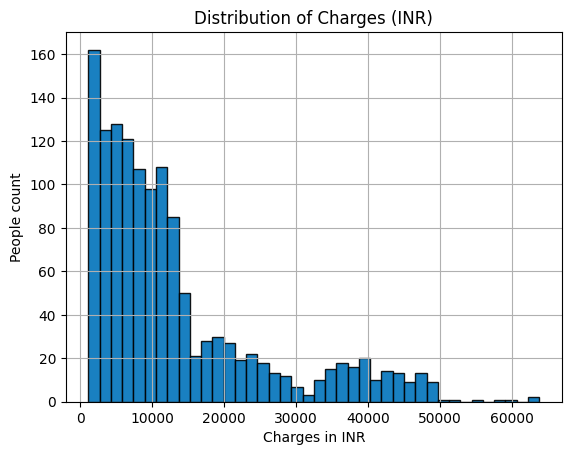

In [ ]:
# Data Visualization- Distribution of charges (Histogram)
plt.figure()
df['Charges in INR'].hist(bins=40, color = "#0072bb",edgecolor="black",alpha = 0.9)
plt.title("Distribution of Charges (INR)")
plt.xlabel("Charges in INR")
plt.ylabel("People count")
plt.show()

<Figure size 640x480 with 0 Axes>

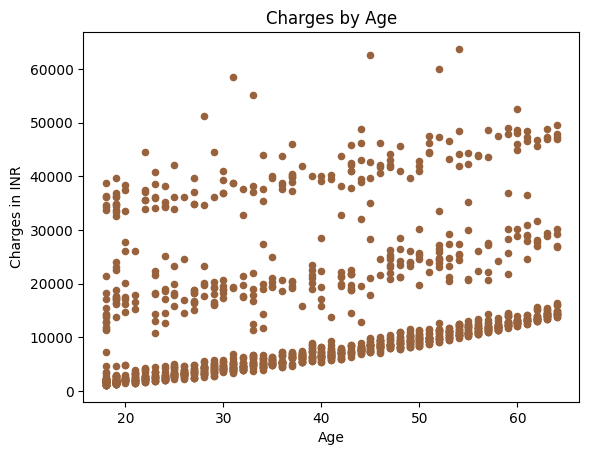

In [240]:
# Charges by Age
plt.figure()
df.plot.scatter(x='Age', y='Charges in INR',color = "#98623c")
plt.title("Charges by Age")
plt.xlabel("Age")
plt.ylabel("Charges in INR")
plt.show()

<Figure size 640x480 with 0 Axes>

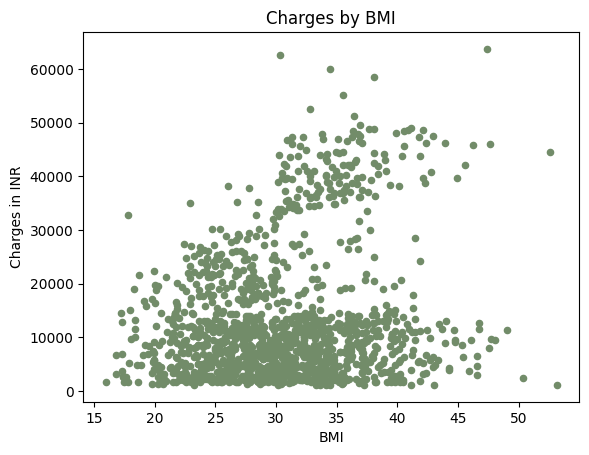

In [241]:
# Charges as per BMI
plt.figure()
df.plot.scatter(x='BMI', y='Charges in INR',color = "#728c69")
plt.title("Charges by BMI")
plt.xlabel("BMI")
plt.ylabel("Charges in INR")
plt.show()

In [189]:
# Outlier Check for Charges
charges = df['Charges in INR']
q1, q3 = charges.quantile([0.25, 0.75])
iqr = q3 - q1
upper = q3 + 1.5 * iqr
outliers = (charges > upper).sum()

print("\nIQR Outlier check (Charges):")
print("Q1 =", q1, "Q3 =", q3, "IQR =", iqr)
print("Upper threshold =", upper)
print("Outliers count =", outliers)


IQR Outlier check (Charges):
Q1 = 4740.28715 Q3 = 16639.912515 IQR = 11899.625365
Upper threshold = 34489.350562499996
Outliers count = 139


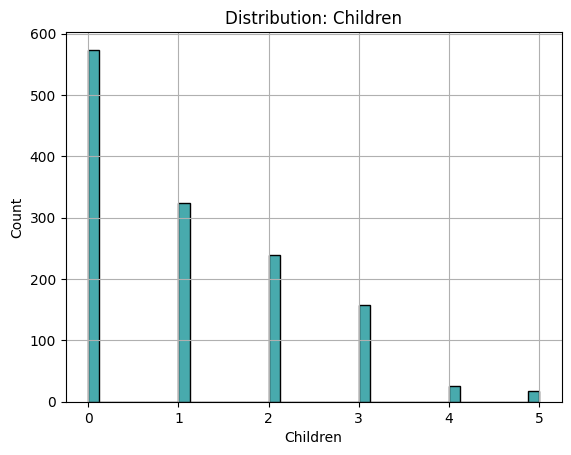

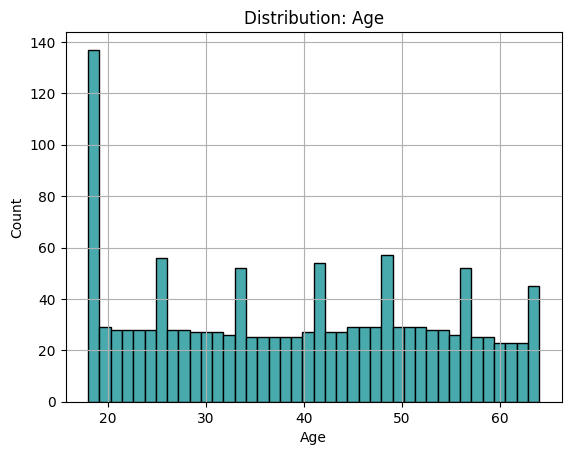

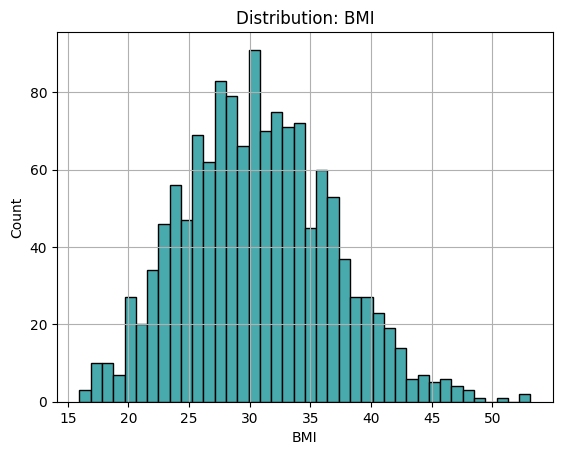

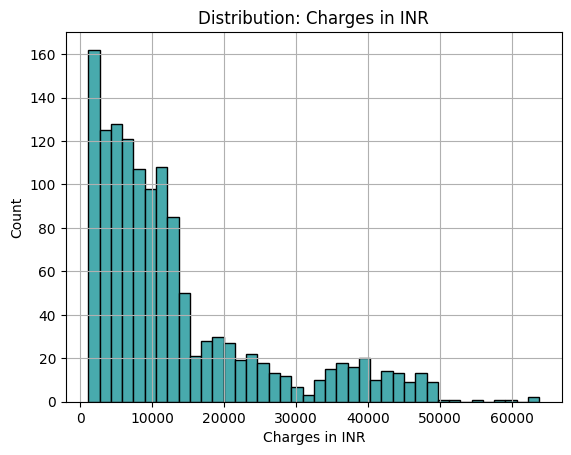

In [190]:
# Univariate Analysis (Numeric)
for c in num_cols:
    plt.figure()
    df[c].hist(bins=40, color = "#48aaad",edgecolor="black")
    plt.title(f"Distribution: {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()

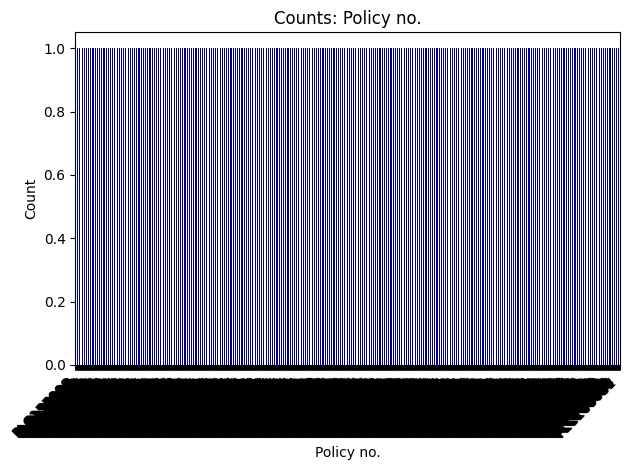

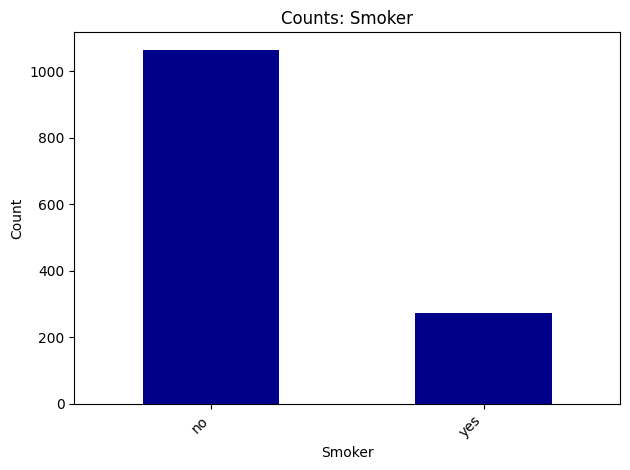

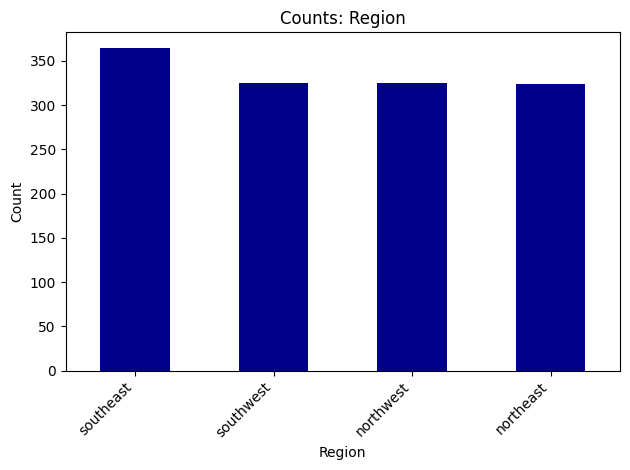

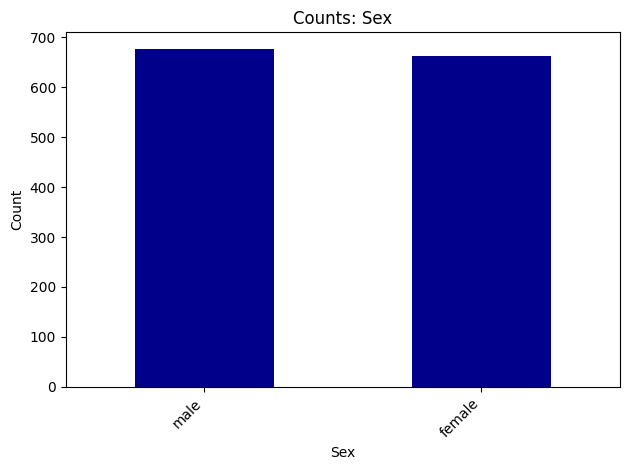

In [188]:
# Univariate Analysis (Categorical)
for c in cat_cols:
    plt.figure()
    df[c].value_counts().plot(kind="bar",color = "darkblue")
    plt.title(f"Counts: {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [51]:
#Correlation
corr = df[['Children','Age','BMI','Charges in INR']].corr(numeric_only=True)
display(corr)

,Children,Age,BMI,Charges in INR
Children,1.000000,0.042469,0.012759,0.067998
Age,0.042469,1.000000,0.109272,0.299008
BMI,0.012759,0.109272,1.000000,0.198341
Charges in INR,0.067998,0.299008,0.198341,1.000000


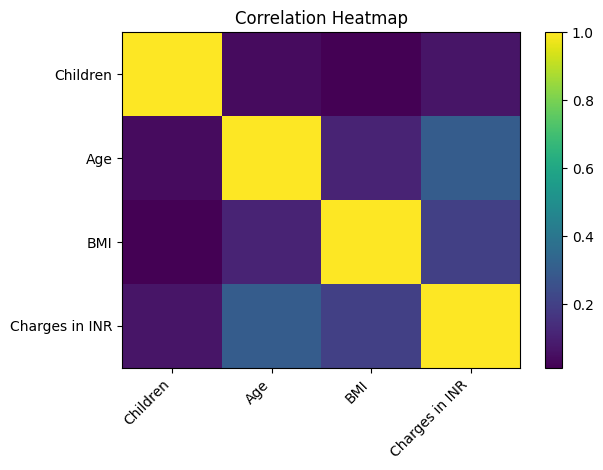

In [182]:
#Correlation Heatmap
if len(num_cols) >= 2:
    corr = df[num_cols].corr(numeric_only=True)
    plt.figure()
    plt.imshow(corr, aspect="auto")
    plt.title("Correlation Heatmap")
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
    plt.yticks(range(len(corr.index)), corr.index)
    plt.colorbar()
    plt.tight_layout()
    plt.show()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,662.0,12569.578844,11128.703801,1607.5101,4885.1587,9412.96250,14454.691825,63770.42801
male,676.0,13956.751178,12971.025915,1121.8739,4619.1340,9369.61575,18989.590250,62592.87309


<Figure size 640x480 with 0 Axes>

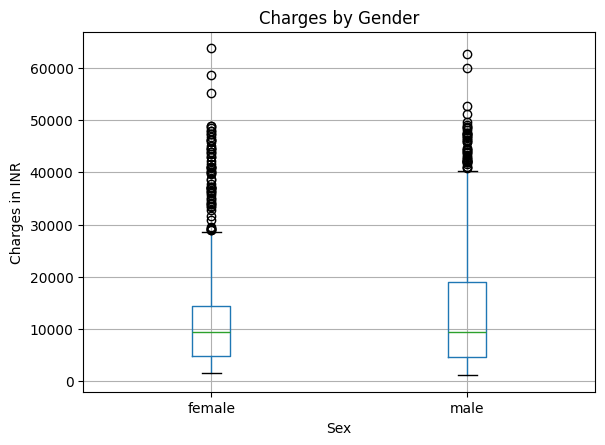

In [183]:
#Charges by Gender
if "Sex" in df.columns:
    display(df.groupby("Sex")[target].describe())
    plt.figure()
    df.boxplot(column=target, by="Sex")
    plt.title("Charges by Gender")
    plt.suptitle("")
    plt.xlabel("Sex")
    plt.ylabel(target)
    plt.show()

In [193]:
# Average amount spent per Policy Cover
target = "Charges in INR"
print("Average Charges(INR):", df[target].mean())

Average Charges(INR): 13270.422265141257


,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
northeast,324.0,13406.384516,11255.803066,1694.7964,5194.322288,10057.652025,16687.3641,58571.07448
northwest,325.0,12417.575374,11072.276928,1621.3402,4719.736550,8965.795750,14711.7438,60021.39897
southeast,364.0,14735.411438,13971.098589,1121.8739,4440.886200,9294.131950,19526.2869,63770.42801
southwest,325.0,12346.937377,11557.179101,1241.5650,4751.070000,8798.593000,13462.5200,52590.82939


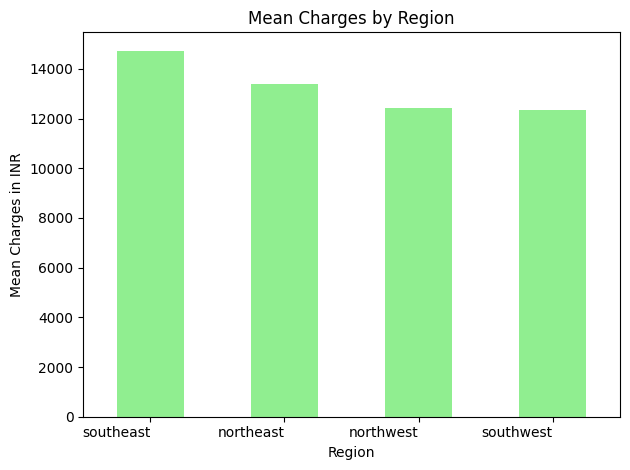

In [239]:
# Charges by Region
if "Region" in df.columns:
    display(df.groupby("Region")[target].describe())
    region_mean = df.groupby("Region")[target].mean().sort_values(ascending=False)
    plt.figure()
    region_mean.plot(kind="bar",color = "lightgreen")
    plt.title("Mean Charges by Region")
    plt.xlabel("Region")
    plt.ylabel(f"Mean {target}")
    plt.xticks(rotation=0, ha="right")
    plt.tight_layout()
    plt.show()

,count,mean,std,min,25%,50%,75%,max
Children,,,,,,,,
0,574.0,12365.975602,12023.293942,1121.8739,2734.421150,9856.95190,14440.123825,63770.42801
1,324.0,12731.171832,11823.631451,1711.0268,4791.643175,8483.87015,15632.052050,58571.07448
2,240.0,15073.563734,12891.368347,2304.0022,6284.939438,9264.97915,20379.276748,49577.66240
3,157.0,15355.318367,12330.869484,3443.0640,6652.528800,10600.54830,19199.944000,60021.39897
4,25.0,13850.656311,9139.223321,4504.6624,7512.267000,11033.66170,17128.426080,40182.24600
5,18.0,8786.035247,3808.435525,4687.7970,5874.973900,8589.56505,10019.943975,19023.26000


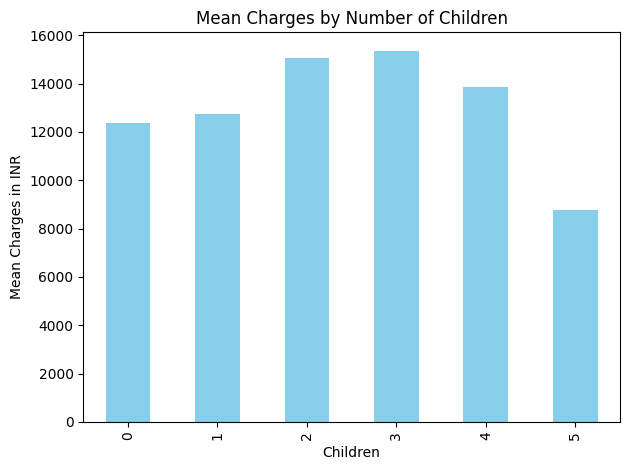

In [186]:
# Charges by Number of children
if "Children" in df.columns:
    display(df.groupby("Children")[target].describe())
    children_mean = df.groupby("Children")[target].mean().sort_index()
    plt.figure()
    children_mean.plot(kind="bar",color = "skyblue")
    plt.title("Mean Charges by Number of Children")
    plt.xlabel("Children")
    plt.ylabel(f"Mean {target}")
    plt.tight_layout()
    plt.show()

,count,mean,std,min,25%,50%,75%,max
Smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


<Figure size 640x480 with 0 Axes>

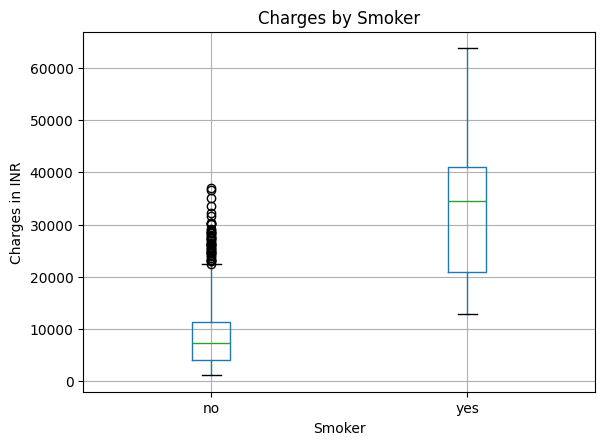

In [191]:
# Charges by Smokers
if "Smoker" in df.columns:
    display(df.groupby("Smoker")[target].describe())
    plt.figure()
    df.boxplot(column=target, by="Smoker")
    plt.title("Charges by Smoker")
    plt.suptitle("")
    plt.xlabel("Smoker")
    plt.ylabel(target)
    plt.show()

Smoker,no,yes
BMI,,
Underweight,5485.056800,18809.824980
Normal,7734.650116,19942.223641
Overweight,8226.088675,22491.182935
Obese I,8549.952377,39880.271809
Obese II+,9244.504533,43556.403559


<Figure size 640x480 with 0 Axes>

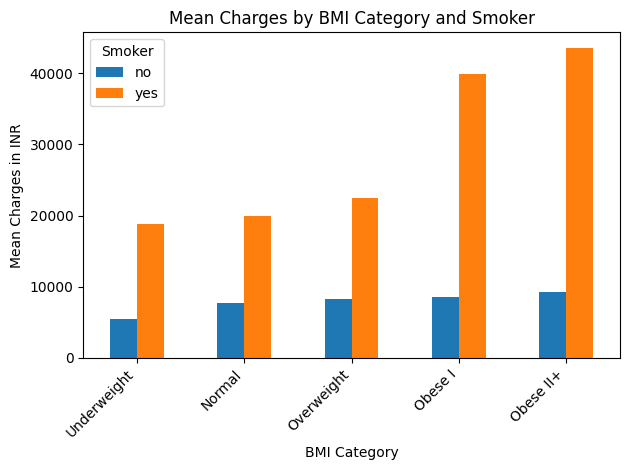

In [214]:
# Discounts based on BMI (EDA view: show charges by BMI category + smoker split)
if "BMI" in df.columns and "Smoker" in df.columns:
    bmi_bins = pd.cut(df["BMI"], bins=[0, 18.5, 25, 30, 35, 100],
                      labels=["Underweight", "Normal", "Overweight", "Obese I", "Obese II+"])
    pivot = df.pivot_table(values=target, index=bmi_bins, columns="Smoker", aggfunc="mean", observed = False)
    display(pivot)

    plt.figure()
    pivot.plot(kind="bar")
    plt.title("Mean Charges by BMI Category and Smoker")
    plt.xlabel("BMI Category")
    plt.ylabel(f"Mean {target}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [196]:
# Outlier check (IQR) for Charges
q1, q3 = df[target].quantile([0.25, 0.75])
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
outliers = df[(df[target] > upper) | (df[target] < lower)]
print("\nOutlier thresholds:")
print("Lower:", lower, "| Upper:", upper)
print("Outlier rows:", outliers.shape[0])

display(outliers.sort_values(by= target, ascending= False).head(10))


Outlier thresholds:
Lower: -13109.1508975 | Upper: 34489.350562499996
Outlier rows: 139


,Policy no.,Children,Smoker,Region,Age,Sex,BMI,Charges in INR
859,PLC161785,0,yes,southeast,54,female,47.410,63770.42801
1322,PLC168598,0,yes,southeast,45,male,30.360,62592.87309
1324,PLC167968,3,yes,northwest,52,male,34.485,60021.39897
879,PLC162091,1,yes,northeast,31,female,38.095,58571.07448
1131,PLC164269,0,yes,northwest,33,female,35.530,55135.40209
1287,PLC167212,0,yes,southwest,60,male,32.800,52590.82939
64,PLC157204,1,yes,southwest,28,male,36.400,51194.55914
1318,PLC168067,2,yes,southeast,64,male,36.960,49577.66240
1277,PLC166456,1,yes,southeast,59,male,41.140,48970.24760
781,PLC161290,0,yes,southeast,44,female,38.060,48885.13561
